# Day 41: 70 Days Pre-Bootcamp Online Class with Data Science Nigeria - Machine Learning Stream #DSN70daysofML
Mean Shift from Scratch <br>
<b> Notes; </b>
* Mean Shift method is to;
    1. Make all datapoints centroids
    2. Take mean of all featuresets within centroid's radius, setting this mean as new centroid.
    3. Repeat step #2 until convergence.
* In Mean Shift algorithm, a new cluster center is created by taking the mean of all the data within the radius of the old cluster center .<br>
* The function "set()" returns unique elements.<br>
* Convergence of new centroid values is the test for knowing when to stop finding new centroids .<br>

In [1]:
#import libraries
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
data = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

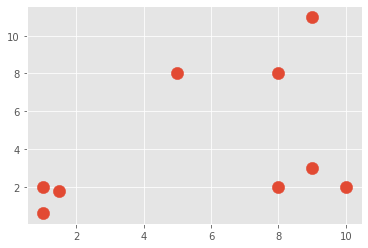

In [3]:
plt.scatter(data[:,0], data[:,1], s=150)
plt.show()

colors = 10*['g', 'r', 'c', 'b', 'k']

In [4]:
# With K Means, we told the machine that we wanted 'k' clusters (2). 
# With Mean Shift, we're expecting that the machine just figures that out on its own, 
#and, for us, we're expecting three groups with the code.
class Mean_Shift:
    def __init__(self, radius=4): #the radius of 4 was estimated
        self.radius = radius
    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

# Here, we begin iterating through each centroid, and finding all featuresets in range. 
# From there, we are taking the average, and setting that average as the "new centroid." 
#Finally, we're creating a uniques variable, which tracks the sorted list of all known centroids. 
# We use set here since there may be duplicates, and duplicate centroids are really just the same centroid.                
            uniques = sorted(list(set(new_centroids)))
            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids

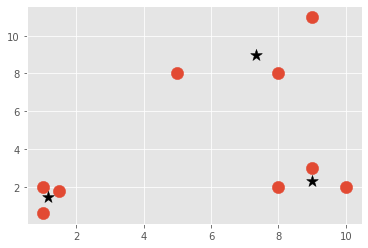

In [5]:
clf = Mean_Shift()
clf.fit(data)

centroids = clf.centroids

plt.scatter(data[:,0], data[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()